# Cleaning Star Wars Survey Data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

Although Respondent ID is meant to be unique to each repondent, there are some missing values that need to be removed. 

In [3]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars[star_wars.columns[:4]].head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace
2,3.292880e+09,No,NaN,NaN
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace


In [4]:
#listing column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Converting Values to Boolean

In [5]:
#converting Yes and No answers to True and False
boolDict = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(boolDict)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(boolDict)
star_wars.iloc[:5, 1:3]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


The different options for the question '*Which of the following Star Wars films have you seen? Please select all that apply*' are spread out between col indices 3 and 8.  Each movie has a column with two values: the name of the movie if it was checked and NaN.  

In [6]:
#turning checked columns into boolean
cols = star_wars.columns[3:9]
movies = ["Star Wars: Episode I  The Phantom Menace", 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']

import numpy as np
for i in range(0,6):
    boolDict2 = {(movies[i]): True, np.nan: False}
    star_wars[cols[i]] = star_wars[cols[i]].map(boolDict2)
    #renaming columns to seen and movie number
    star_wars = star_wars.rename(columns = {cols[i]: ('seen_' + str(i+1))})
    star_wars[star_wars.columns[3:9]].head(5)

## Rankings and People Who've Seen

Columns with indices of 9 through 14 contain rankings for each of the six star wars movies (in order): Unless missing, the number in each column ranging from 1 to 6 indicates if the movie was the most favorite to the least favorite.  

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

for i in range(0, 6):
    oldc = star_wars.columns[9:15][i]
    star_wars = star_wars.rename(columns = {oldc: 'ranking_' + str(i+1)})

print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


In [13]:
avgrank = star_wars[star_wars.columns[9:15]].mean()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

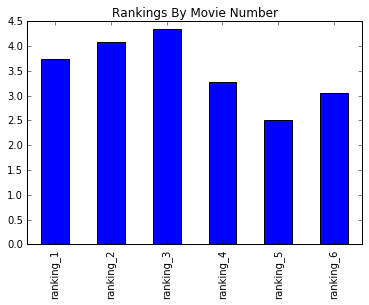

In [14]:
avgrank.plot.bar(title = 'Rankings By Movie Number')
plt.show()

On average, the third Star Wars movie was ranked the highest and the fifth Star Wars movie was ranked the lowest.

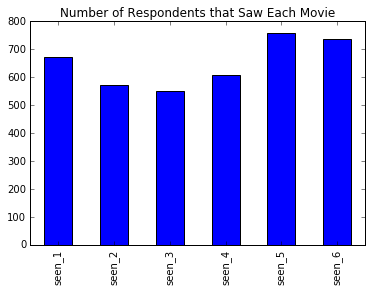

In [17]:
totalseen = star_wars[star_wars.columns[3:9]].sum()
totalseen.plot.bar(title = 'Number of Respondents that Saw Each Movie')
plt.show()

Taking into account the previous two bar charts, it looks like the Star Wars movie with the highest rankings (3rd) was also the lowest seen.  In addition, the movie with the lowest rankings (5th) was the most seen.

## Rankings and Movies Seen by Fans and Non-Fans

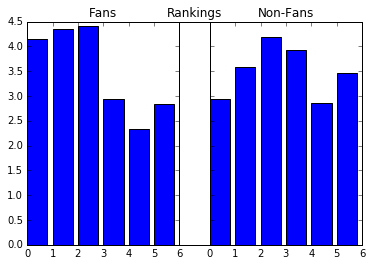

In [37]:
#separating data by fans and nonfans
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
nonfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

fig = plt.figure()
plt.title('Rankings')
plt.tick_params(labelleft = 'off', labelbottom = 'off')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(range(0,6), fans[fans.columns[9:15]].mean())
ax1.set_title('Fans')
ax1.set_ylim(0, 4.5)

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(range(0,6), nonfans[nonfans.columns[9:15]].mean())
ax2.set_title('Non-Fans')
ax2.tick_params(labelleft = 'off')
ax2.set_ylim(0, 4.5)
plt.show()



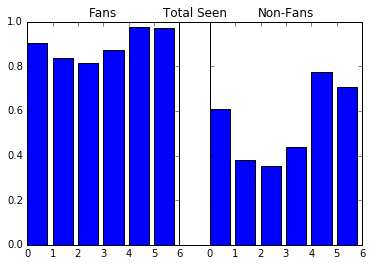

In [36]:
fig2 = plt.figure()
plt.title('Total Seen')
plt.tick_params(labelleft = 'off', labelbottom = 'off')


ax3 = fig2.add_subplot(1, 2, 1)
ax3.bar(range(0,6), fans[fans.columns[3:9]].mean())
ax3.set_title('Fans')
ax3.set_ylim(0,1)

ax4 = fig2.add_subplot(1, 2, 2)
ax4.bar(range(0,6), nonfans[nonfans.columns[3:9]].mean())
ax4.set_title('Non-Fans')
ax4.tick_params(labelleft = 'off')
ax4.set_ylim(0,1)
plt.show()

It appears that the first three Star Wars movies appeared to be ranked higher by fans whereas the last three movies are ranked higher by non-fans. As expected, all six movies were seen by more fans than non-fans.  It could be interesting to review how many fans and non-fans answered the survey.